<h1> Líneas de emisión </h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def clean_nist_value(value):
    """Función para limpiar valores del formato NIST"""
    if pd.isna(value) or value == '""' or value == '=""' or value == '=""""':
        return np.nan
    if isinstance(value, str):
        cleaned = value.replace('=', '').replace('"', '').strip()
        if cleaned == '':
            return np.nan
        # Intentar convertir a número si es posible
        try:
            return float(cleaned) if '.' in cleaned or 'e' in cleaned.lower() else int(cleaned)
        except ValueError:
            return cleaned
    return value

<h2> O I y O II </h2>

In [2]:
# Cargar los datos
df = pd.read_csv('oxigeno.csv', dtype=str)

# Aplicar limpieza a todas las celdas
df = df.map(clean_nist_value)

# Especificar manualmente las columnas numéricas
numeric_cols = ['obs_wl_vac(nm)', 'ritz_wl_vac(nm)', 'intens', 'Aki(s^-1)', 'Ei(eV)', 'Ek(eV)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Crear columna de tipo de espectro
df['spectrum_type'] = df['sp_num'].map({1: 'O I', 2: 'O II'})

# Mostrar información del DataFrame limpio
print(f"Total de líneas: {len(df)}")
print(f"Líneas O I: {len(df[df['sp_num']==1])}")
print(f"Líneas O II: {len(df[df['sp_num']==2])}")

NameError: name 'pd' is not defined

In [ ]:
df.head()

,element,sp_num,obs_wl_vac(nm),ritz_wl_vac(nm),intens,Aki(s^-1),Acc,Ei(eV),Ek(eV),conf_i,term_i,J_i,conf_k,term_k,J_k,Type,tp_ref,line_ref,Unnamed: 18,spectrum_type
0,O,2,NaN,5187.95,NaN,6960.0,D,28.829685,29.068670,2s2.2p2.(1D).3p,2P*,3/2,2s2.2p2.(3P).3d,2D,5/2,NaN,T6172,NaN,NaN,O II
1,O,2,NaN,5201.95,NaN,5370.0,D,28.823901,29.062243,2s2.2p2.(1D).3p,2P*,1/2,2s2.2p2.(3P).3d,2D,3/2,NaN,T6172,NaN,NaN,O II
2,O,2,NaN,5214.74,NaN,1060.0,B,28.591928,28.829685,2s2.2p2.(1S).3s,2S,1/2,2s2.2p2.(1D).3p,2P*,3/2,NaN,T6172,NaN,NaN,O II
3,O,2,NaN,5331.32,NaN,1540.0,D,28.829685,29.062243,2s2.2p2.(1D).3p,2P*,3/2,2s2.2p2.(3P).3d,2D,3/2,NaN,T6172,NaN,NaN,O II
4,O,2,NaN,5344.76,NaN,986.0,B,28.591928,28.823901,2s2.2p2.(1S).3s,2S,1/2,2s2.2p2.(1D).3p,2P*,1/2,NaN,T6172,NaN,NaN,O II


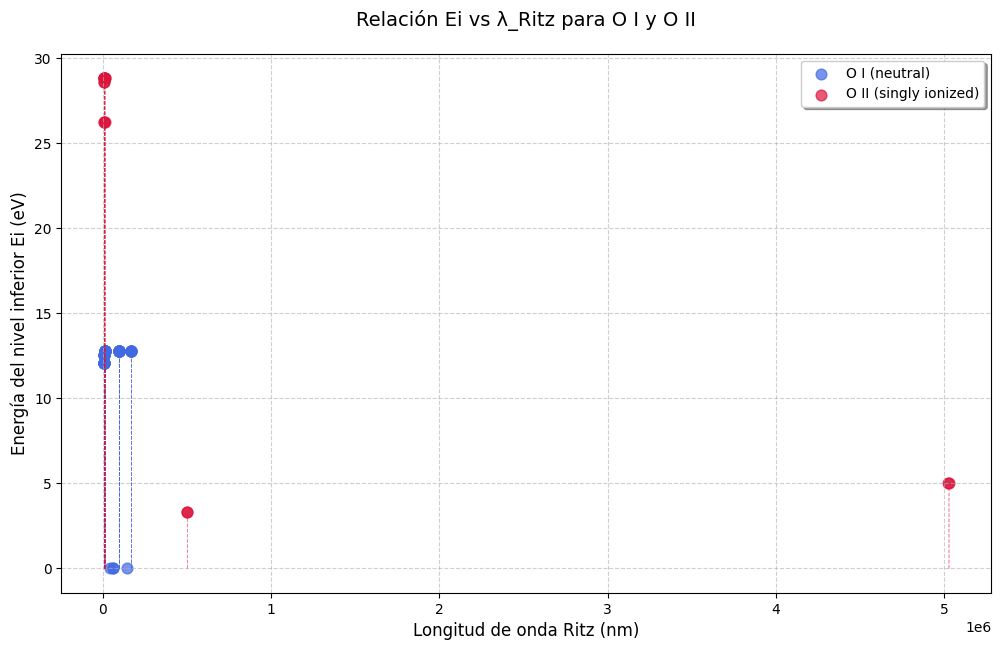

In [ ]:
# Filtrar datos para O I y O II
o1 = df[df['sp_num'] == 1].dropna(subset=['ritz_wl_vac(nm)', 'Ei(eV)'])
o2 = df[df['sp_num'] == 2].dropna(subset=['ritz_wl_vac(nm)', 'Ei(eV)'])

# Configuración del gráfico
plt.figure(figsize=(12, 7))

# Graficar O I
plt.scatter(o1['ritz_wl_vac(nm)'], o1['Ei(eV)'], 
            c='royalblue', s=60, alpha=0.7, label='O I (neutral)')

# Graficar O II
plt.scatter(o2['ritz_wl_vac(nm)'], o2['Ei(eV)'], 
            c='crimson', s=60, alpha=0.7, label='O II (singly ionized)')

# Añadir líneas verticales para O I
for x, y in zip(o1['ritz_wl_vac(nm)'], o1['Ei(eV)']):
    plt.plot([x, x], [0, y], color='royalblue', linestyle='--', alpha=0.3, linewidth=0.7)

# Añadir líneas verticales para O II
for x, y in zip(o2['ritz_wl_vac(nm)'], o2['Ei(eV)']):
    plt.plot([x, x], [0, y], color='crimson', linestyle='--', alpha=0.3, linewidth=0.7)

# Configuración de ejes y título
plt.xlabel('Longitud de onda Ritz (nm)', fontsize=12)
plt.ylabel('Energía del nivel inferior Ei (eV)', fontsize=12)
plt.title('Relación Ei vs λ_Ritz para O I y O II', fontsize=14, pad=20)

# Añadir leyenda y grid
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)

<h2> Ar I y Ar II </h2>

In [ ]:
# Cargar los datos
df = pd.read_csv('ar.csv', dtype=str)

# Aplicar limpieza a todas las celdas
df = df.map(clean_nist_value)

# Especificar manualmente las columnas numéricas
numeric_cols = ['obs_wl_vac(nm)', 'ritz_wl_vac(nm)', 'intens', 'Aki(s^-1)', 'Ei(eV)', 'Ek(eV)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Crear columna de tipo de espectro
df['spectrum_type'] = df['sp_num'].map({1: 'Ar I', 2: 'Ar II'})

# Mostrar información del DataFrame limpio
print(f"Total de líneas: {len(df)}")
print(f"Líneas O I: {len(df[df['sp_num']==1])}")
print(f"Líneas O II: {len(df[df['sp_num']==2])}")

Total de líneas: 7
Líneas O I: 0
Líneas O II: 7


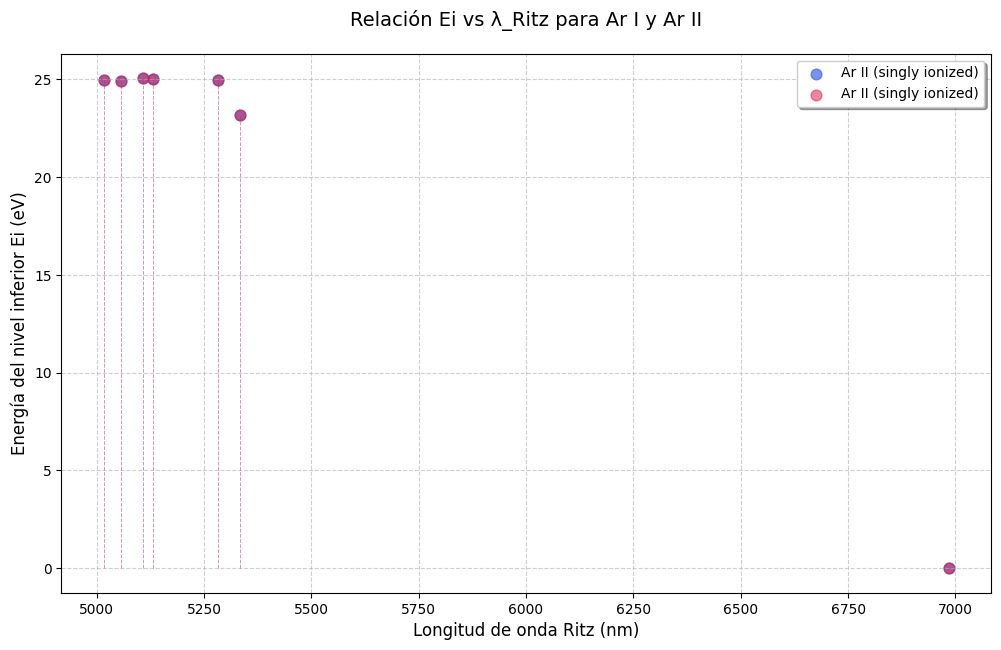

In [ ]:
# Filtrar datos para O I y O II
ar2 = df[df['sp_num'] == 2].dropna(subset=['obs_wl_vac(nm)', 'ritz_wl_vac(nm)', 'Ei(eV)'])

# Configuración del gráfico
plt.figure(figsize=(12, 7))

# Graficar O I
plt.scatter(ar2['obs_wl_vac(nm)'], ar2['Ei(eV)'], 
            c='royalblue', s=60, alpha=0.7, label='Ar II (singly ionized)')

# Graficar O II
plt.scatter(ar2['ritz_wl_vac(nm)'], ar2['Ei(eV)'], 
            c='crimson', s=60, alpha=0.5, label='Ar II (singly ionized)')

# Añadir líneas verticales para O I
for x, y in zip(ar2['obs_wl_vac(nm)'], ar2['Ei(eV)']):
    plt.plot([x, x], [0, y], color='royalblue', linestyle='--', alpha=0.3, linewidth=0.7)

# Añadir líneas verticales para O II
for x, y in zip(ar2['ritz_wl_vac(nm)'], ar2['Ei(eV)']):
    plt.plot([x, x], [0, y], color='crimson', linestyle='--', alpha=0.3, linewidth=0.7)

# Configuración de ejes y título
plt.xlabel('Longitud de onda Ritz (nm)', fontsize=12)
plt.ylabel('Energía del nivel inferior Ei (eV)', fontsize=12)
plt.title('Relación Ei vs λ_Ritz para Ar I y Ar II', fontsize=14, pad=20)

# Añadir leyenda y grid
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)

<h2> N I y N II </h2>

In [ ]:
# Cargar los datos
df = pd.read_csv('nitrogeno.csv', dtype=str)

# Aplicar limpieza a todas las celdas
df = df.map(clean_nist_value)

# Especificar manualmente las columnas numéricas
numeric_cols = ['ritz_wl_vac(nm)', 'intens', 'Aki(s^-1)', 'Ei(eV)', 'Ek(eV)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Crear columna de tipo de espectro
df['spectrum_type'] = df['sp_num'].map({1: 'N I', 2: 'N II'})

# Mostrar información del DataFrame limpio
print(f"Total de líneas: {len(df)}")
print(f"Líneas O I: {len(df[df['sp_num']==1])}")
print(f"Líneas O II: {len(df[df['sp_num']==2])}")

Total de líneas: 221
Líneas O I: 206
Líneas O II: 15


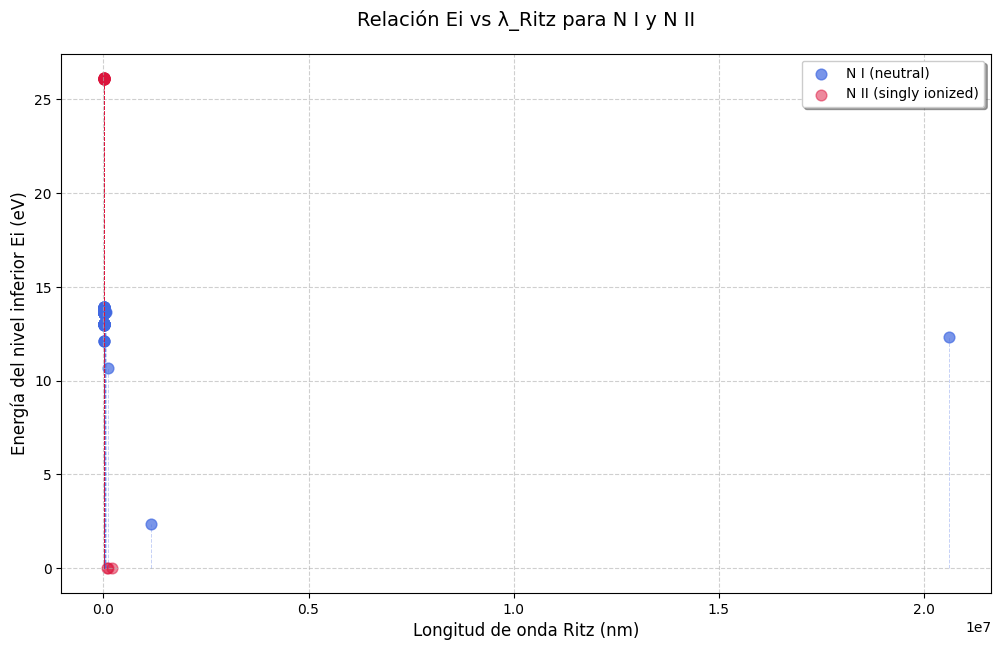

In [ ]:
# Filtrar datos para O I y O II
n1 = df[df['sp_num'] == 1].dropna(subset=['ritz_wl_vac(nm)', 'Ei(eV)'])
n2 = df[df['sp_num'] == 2].dropna(subset=['ritz_wl_vac(nm)', 'Ei(eV)'])

# Configuración del gráfico
plt.figure(figsize=(12, 7))

# Graficar N I
plt.scatter(n1['ritz_wl_vac(nm)'], n1['Ei(eV)'], 
            c='royalblue', s=60, alpha=0.7, label='N I (neutral)')

# Graficar N II
plt.scatter(n2['ritz_wl_vac(nm)'], n2['Ei(eV)'], 
            c='crimson', s=60, alpha=0.5, label='N II (singly ionized)')

# Añadir líneas verticales para O I
for x, y in zip(n1['ritz_wl_vac(nm)'], n1['Ei(eV)']):
    plt.plot([x, x], [0, y], color='royalblue', linestyle='--', alpha=0.3, linewidth=0.7)

# Añadir líneas verticales para O II
for x, y in zip(n2['ritz_wl_vac(nm)'], n2['Ei(eV)']):
    plt.plot([x, x], [0, y], color='crimson', linestyle='--', alpha=0.3, linewidth=0.7)

# Configuración de ejes y título
plt.xlabel('Longitud de onda Ritz (nm)', fontsize=12)
plt.ylabel('Energía del nivel inferior Ei (eV)', fontsize=12)
plt.title('Relación Ei vs λ_Ritz para N I y N II', fontsize=14, pad=20)

# Añadir leyenda y grid
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)

<h2> B I y B II </h2>

In [ ]:
# Cargar los datos
df = pd.read_csv('boro.csv', dtype=str)

# Aplicar limpieza a todas las celdas
df = df.map(clean_nist_value)

# Especificar manualmente las columnas numéricas
numeric_cols = ['ritz_wl_vac(nm)', 'intens', 'Aki(s^-1)', 'Ei(eV)', 'Ek(eV)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Crear columna de tipo de espectro
df['spectrum_type'] = df['sp_num'].map({1: 'B I', 2: 'B II'})

# Mostrar información del DataFrame limpio
print(f"Total de líneas: {len(df)}")
print(f"Líneas O I: {len(df[df['sp_num']==1])}")
print(f"Líneas O II: {len(df[df['sp_num']==2])}")

Total de líneas: 55
Líneas O I: 34
Líneas O II: 21


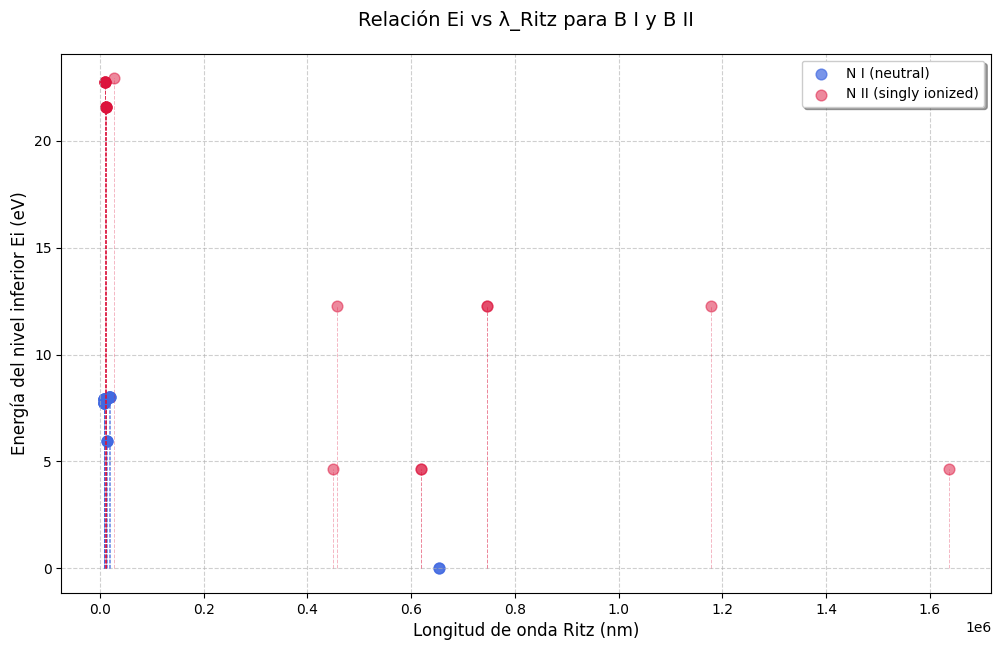

In [ ]:
# Filtrar datos para O I y O II
b1 = df[df['sp_num'] == 1].dropna(subset=['ritz_wl_vac(nm)', 'Ei(eV)'])
b2 = df[df['sp_num'] == 2].dropna(subset=['ritz_wl_vac(nm)', 'Ei(eV)'])

# Configuración del gráfico
plt.figure(figsize=(12, 7))

# Graficar N I
plt.scatter(b1['ritz_wl_vac(nm)'], b1['Ei(eV)'], 
            c='royalblue', s=60, alpha=0.7, label='N I (neutral)')

# Graficar N II
plt.scatter(b2['ritz_wl_vac(nm)'], b2['Ei(eV)'], 
            c='crimson', s=60, alpha=0.5, label='N II (singly ionized)')

# Añadir líneas verticales para O I
for x, y in zip(b1['ritz_wl_vac(nm)'], b1['Ei(eV)']):
    plt.plot([x, x], [0, y], color='royalblue', linestyle='--', alpha=0.3, linewidth=0.7)

# Añadir líneas verticales para O II
for x, y in zip(b2['ritz_wl_vac(nm)'], b2['Ei(eV)']):
    plt.plot([x, x], [0, y], color='crimson', linestyle='--', alpha=0.3, linewidth=0.7)

# Configuración de ejes y título
plt.xlabel('Longitud de onda Ritz (nm)', fontsize=12)
plt.ylabel('Energía del nivel inferior Ei (eV)', fontsize=12)
plt.title('Relación Ei vs λ_Ritz para B I y B II', fontsize=14, pad=20)

# Añadir leyenda y grid
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)